In [ ]:
pip install minepy

In [ ]:
#importing packages
import pandas as pd #processing the data
import numpy as np #linear algebra
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time as tm
import math
from minepy import MINE
from sklearn.feature_selection import SelectKBest

# Distribution of features

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-34.7 , -26.53, -18.36, -10.19,  -2.02,   6.15,  14.32,  22.49,
         30.66,  38.83,  47.  ]),
 <a list of 453 Lists of Patches objects>)

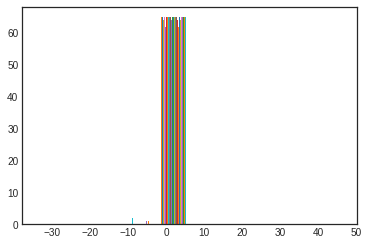

In [ ]:
#reading csv files as dataframes
bank = pd.read_csv('bankrupcy.csv')
plt.style.use('seaborn-white')
plt.hist(bank)

In [ ]:
bank.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,attribute11,attribute12,attribute13,attribute14,attribute15,attribute16,attribute17,attribute18,attribute19,attribute20,attribute21,attribute22,attribute23,attribute24,attribute25,attribute26,attribute27,attribute28,attribute29,attribute30,attribute31,attribute32,attribute33,attribute34,attribute35,attribute36,attribute37,attribute38,attribute39,attribute40,attribute41,attribute42,attribute43,attribute44,attribute45,attribute46,attribute47,attribute48,attribute49,attribute50,attribute51,attribute52,attribute53,attribute54,attribute55,attribute56,attribute57,attribute58,attribute59,attribute60,attribute61,attribute62,attribute63,attribute64,ClassLabel
0,-0.0315,-0.0913,-0.0403,-0.0135,0.00741,-0.0160,-0.000264,0.6410,-0.748,0.1270,-0.214,-0.0366,-0.01090,-0.000269,-0.00530,-0.243,0.5800,-0.00240,0.02930,-0.07030,-0.0164,-0.4030,0.03310,-0.00452,0.0502,-0.207,-0.00999,-0.0194,-0.6310,-0.0155,0.06620,-0.01400,-0.3690,-0.144,-0.436,-0.974000,-0.0341,0.07980,-0.0162,0.1810,-0.00721,-0.0139,-0.0193,-0.00908,0.01720,0.1470,-0.0419,-0.1480,0.00486,-0.192,-1.0300,-0.01330,-0.01640,-0.0181,-0.1110,0.01440,0.00546,-0.01410,-0.02090,0.0684,-0.2140,-0.01390,-0.1740,-0.0468,0
1,-0.2320,-0.0494,0.3040,-0.0810,0.00751,-0.0160,-0.035000,0.0747,0.470,0.0738,-0.836,-0.3000,-0.01310,-0.035000,-0.12000,-0.603,0.0407,-0.03660,-0.02590,-0.04790,-0.0170,-0.8730,-0.02220,0.04890,0.2740,-0.591,-0.01090,-0.0158,-1.1700,-0.0222,-0.03150,-0.02320,0.0220,1.230,-0.986,0.190000,-0.0245,0.01110,-0.0526,-0.0881,-0.00788,-0.0396,-0.0164,-0.00966,0.00237,-0.0135,-0.0350,-0.7900,-0.02520,0.187,-0.0791,-0.02250,-0.00301,-0.0145,-0.1150,0.00849,-0.00839,-0.00867,-0.02310,-0.0335,-0.2060,-0.01520,-0.0731,-0.0272,0
2,-0.0586,0.0651,-0.4880,-0.1890,0.00657,-0.0160,-0.004950,-0.4560,0.270,-0.0713,0.157,-0.1510,-0.01170,-0.004960,0.00948,-0.367,-0.4650,-0.00702,0.00439,0.00176,-0.0175,0.1520,0.00817,0.03060,-0.1140,-0.339,-0.00993,-0.0209,0.0962,-0.0152,0.00913,-0.01600,-0.3200,0.060,0.766,-0.000812,-0.0345,-0.02380,0.0685,-0.1480,-0.00740,0.0203,-0.0154,-0.01650,0.00391,-0.2350,-0.0129,0.0846,0.03030,-0.469,0.3940,-0.01530,-0.03020,-0.0196,-0.1230,0.01080,0.00678,-0.00944,-0.00792,-0.0435,0.0197,-0.01170,-0.2920,-0.0336,0
3,-0.0694,0.0446,-0.1820,-0.1400,0.00748,-0.0109,-0.005600,-0.4630,-0.287,-0.0853,-0.315,-0.1460,-0.01100,-0.005600,0.04590,-0.454,-0.4140,-0.00765,0.01570,-0.00643,-0.0161,-0.0895,0.01460,-0.03820,-0.1060,-0.443,-0.00992,-0.0196,0.2960,0.0147,0.01130,0.00659,-0.5770,-0.643,-0.100,-1.070000,-0.0345,-0.00411,0.0710,-0.1390,-0.00734,0.0558,0.0187,0.02080,0.00406,-0.0679,-0.0166,0.0795,0.05850,-0.515,-0.2680,0.00728,-0.03390,-0.0200,-0.0771,0.01070,0.00538,-0.01080,0.00138,-0.0428,-0.3510,0.00297,-0.5550,-0.0468,0
4,0.2360,-0.0519,0.6780,-0.0147,0.00788,-0.0160,0.057400,0.0972,0.423,0.0769,0.919,0.2090,-0.00891,0.057400,-0.02100,0.744,0.0621,0.05440,0.06730,-0.04310,-0.0160,0.8670,0.05980,0.10800,-0.1280,0.675,-0.00906,-0.0121,-0.5010,-0.0246,0.06960,-0.02190,-0.0692,0.892,1.000,0.145000,-0.0304,0.01970,0.0763,0.0179,-0.00744,0.0573,-0.0170,-0.01100,0.00655,0.0499,-0.0312,0.6150,0.06310,0.343,-0.2100,-0.02130,0.00523,-0.0107,-0.0766,0.01100,0.02530,-0.01110,-0.02250,-0.0359,-0.1820,-0.01560,-0.0278,-0.0237,0


In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   attribute1   453 non-null    float64
 1   attribute2   453 non-null    float64
 2   attribute3   453 non-null    float64
 3   attribute4   453 non-null    float64
 4   attribute5   453 non-null    float64
 5   attribute6   453 non-null    float64
 6   attribute7   453 non-null    float64
 7   attribute8   453 non-null    float64
 8   attribute9   453 non-null    float64
 9   attribute10  453 non-null    float64
 10  attribute11  453 non-null    float64
 11  attribute12  453 non-null    float64
 12  attribute13  453 non-null    float64
 13  attribute14  453 non-null    float64
 14  attribute15  453 non-null    float64
 15  attribute16  453 non-null    float64
 16  attribute17  453 non-null    float64
 17  attribute18  453 non-null    float64
 18  attribute19  453 non-null    float64
 19  attribut

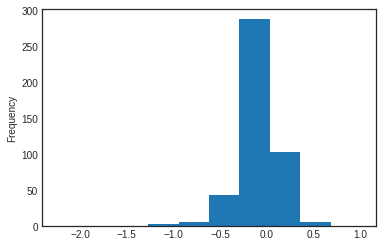

In [ ]:
bank['attribute1'].plot.hist()

Text(0.5, 1.0, 'attribute3')

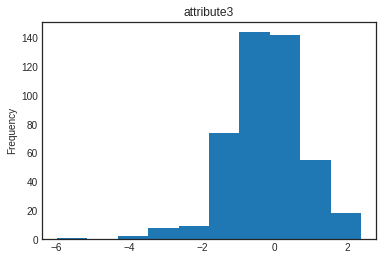

In [ ]:
bank['attribute3'].plot.hist()
plt.title('attribute3')

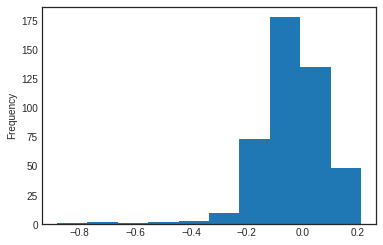

In [ ]:
bank['attribute10'].plot.hist()

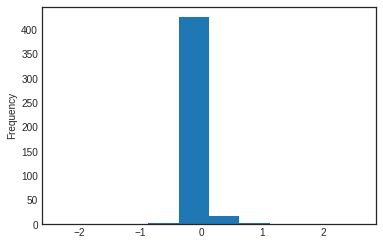

In [ ]:
bank['attribute15'].plot.hist()

Text(0.5, 1.0, 'attribute24')

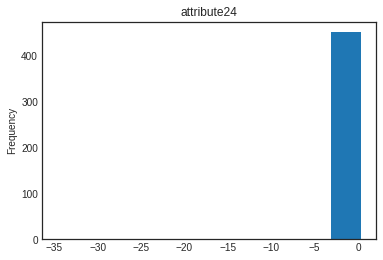

In [ ]:
bank['attribute24'].plot.hist()
plt.title('attribute24')

Text(0.5, 1.0, 'attribute30')

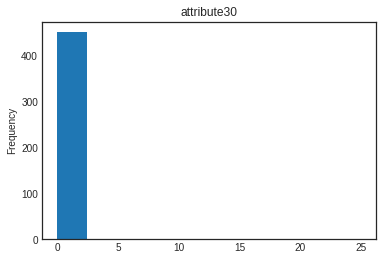

In [ ]:
bank['attribute30'].plot.hist()
plt.title('attribute30')

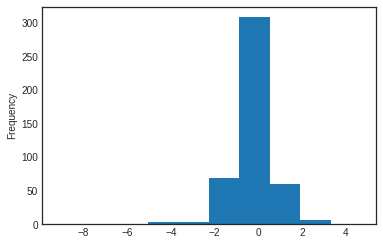

In [ ]:
bank['attribute35'].plot.hist()

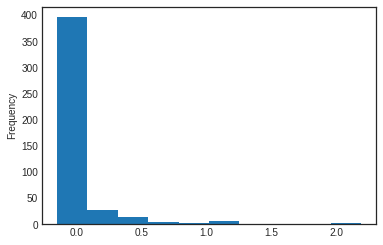

In [ ]:
bank['attribute40'].plot.hist()

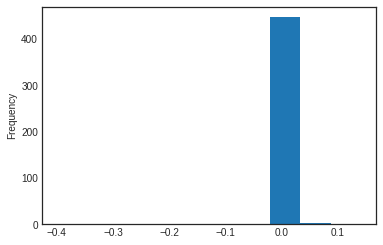

In [ ]:
bank['attribute45'].plot.hist()

Text(0.5, 1.0, 'attribute51')

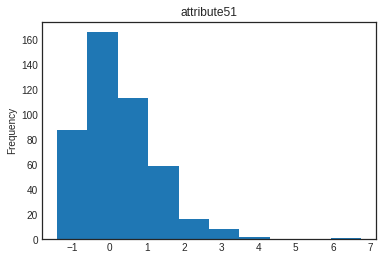

In [ ]:
bank['attribute51'].plot.hist()
plt.title('attribute51')

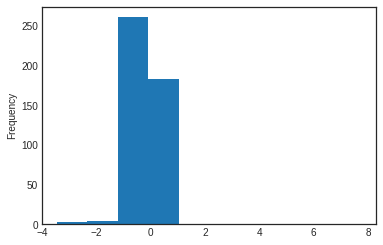

In [ ]:
bank['attribute55'].plot.hist()

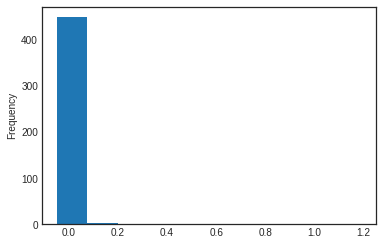

In [ ]:
bank['attribute60'].plot.hist()

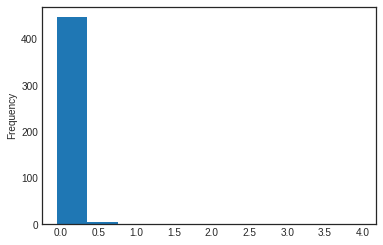

In [ ]:
bank['attribute64'].plot.hist()

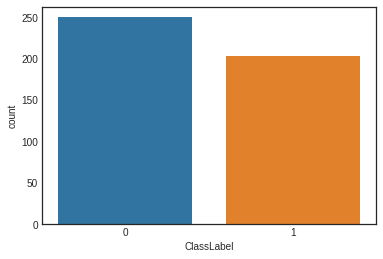

In [ ]:
sns.countplot(x='ClassLabel',data=bank)

In [ ]:

#reading csv files as dataframes
bank = pd.read_csv('bankrupcy.csv')
#segregate features and class labels
X = bank.iloc[:,0:-1]
Y = pd.DataFrame(bank['ClassLabel'])
olddata=X
tol_var=1
#olddata = pd.read_csv('bankrupcy.csv',header=0) # 读取数据
for i in range(0):
    X=olddata.drop([449])
    olddata.index=range(len(olddata))

print(olddata)

def varselect(olddata,tol_var):
    remain_columns=[]
    var=olddata.var()
    for i in range (0,olddata.shape[1]):
        if var.array[i]<tol_var:
            remain_columns.append(olddata.columns[i])
    newdata=olddata.drop(columns=remain_columns)
    print(newdata)
    return newdata


bank=varselect(olddata,tol_var)

     attribute1  attribute2  attribute3  ...  attribute62  attribute63  attribute64
0      -0.03150     -0.0913     -0.0403  ...     -0.01390      -0.1740     -0.04680
1      -0.23200     -0.0494      0.3040  ...     -0.01520      -0.0731     -0.02720
2      -0.05860      0.0651     -0.4880  ...     -0.01170      -0.2920     -0.03360
3      -0.06940      0.0446     -0.1820  ...      0.00297      -0.5550     -0.04680
4       0.23600     -0.0519      0.6780  ...     -0.01560      -0.0278     -0.02370
..          ...         ...         ...  ...          ...          ...          ...
448    -0.06610      0.0447     -0.5630  ...     -0.00584      -0.4540     -0.03860
449    -0.39700      0.4980     -5.9900  ...      0.05360      -0.6810     -0.03680
450     0.00415      0.0145     -0.4380  ...     -0.01520      -0.0674     -0.03130
451     0.13600     -0.0656      0.4620  ...     -0.01990       1.2200      0.00575
452    -0.14000      0.1190     -1.2900  ...      0.00617      -0.5760     -

In [ ]:
##plotting correlation map
#pd.set_option('display.max_columns', None)
#corr = X.corr()
#print(corr)
#print(type(corr))
#sm.graphics.plot_corr(corr, xnames=list(corr.columns))
#plt.show()

#converting pandas dataframe to numpy array
X = X.to_numpy()
Y = Y.to_numpy()
m = X.shape[0] # # of observations
#adding dummy feature '1'
X = np.concatenate((np.ones((m,1)),X),axis=1)
n = X.shape[1] # # of features
print(X)

[[ 1.      -0.0315  -0.0913  ... -0.0139  -0.174   -0.0468 ]
 [ 1.      -0.232   -0.0494  ... -0.0152  -0.0731  -0.0272 ]
 [ 1.      -0.0586   0.0651  ... -0.0117  -0.292   -0.0336 ]
 ...
 [ 1.       0.00415  0.0145  ... -0.0152  -0.0674  -0.0313 ]
 [ 1.       0.136   -0.0656  ... -0.0199   1.22     0.00575]
 [ 1.      -0.14     0.119   ...  0.00617 -0.576   -0.0406 ]]


In [ ]:
#Normalizing features, leaving dummy features unnomalized
for i in range(n-1):
  column = X[:,i+1]
  if max(column) - min(column) == 1: #leave categorial features unnormalized
    pass
  else:
    X[:,i+1] = (X[:,i+1] - min(column))/(max(column) - min(column)) #(X-X_min)/(X_max-X_min)

#print(X)

In [ ]:
class bank_model():
  def __init__(self, X, Y):
    #defining variables
    self.X=X
    self.Y=Y
    self.n = X.shape[1]
    self.m = Y.shape[0]
    self.L = []
    self.w_mean = []
    self.stop_cri = 0
    #self.w = np.zeros((self.n,1))
    self.w = np.random.randn(self.n,1) * 0.01

  def sig(self, z):
    #defining sigmoid function, taking array as input
    s = 1 / (1 + np.exp(-z))
    return s
    
  def fit(self, a, max_iter, e_w1, e_w2, e_L, stop):
    #this module fits the training data according to logistic regression
    #a is learning rate, max_iter defines the maximum # ofiteration of gradient descent
    #e_w1, e_w2 and e_mean defines the threshold of mean weight, maximum weight or loss function that gradient descent is supposed to stop once the threshold is reached
    #stop indicated the stopping criterion: mean of weight fluctuation, max of weight fluctuation, change of loss function compared to the last 10
    L = 1000
    t1 = tm.time()
    for i in range(max_iter):
      #taking sigmoid of w'X
      A = self.sig(np.dot(self.X,self.w))
      L_old = L
      
      #loss function
      L = -np.sum(self.Y*np.log(self.sig(A))+(1-self.Y)*np.log(1-self.sig(A)))
      self.L.append(L)
      self.w_mean.append(np.mean(self.w))
      w_old = self.w

      #gradient descent
      self.w = self.w + a*np.dot(np.transpose(self.X),self.Y-A)

      #defining different stopping criteria
      if stop=='w_mean' and abs(np.mean(self.w)-np.mean(self.w_mean[-22:-2]))<=e_w1:
        self.stop_cri=1
        break
      elif stop=='w_max' and np.max(abs(self.w-w_old))<=e_w2:
        self.stop_cri=2
        break
      elif stop=='L_hist' and abs(L-np.mean(self.L[-22:-2]))<=e_L:
        
        self.stop_cri=3
        break
    t2 = tm.time()
    dt = t2-t1
    end_iter = i
    return self.w_mean, self.w, self.L, L, dt, end_iter, self.stop_cri

  def predict(self, w, X):
    #this module predicts the outcome (1/0) according to the input observation
    #first take the sigmoid of w'T
    result = self.sig(np.dot(X,w))
    #taking 0.5 as threshold
    if result >0.5:
      prediction = 1
    else:
      prediction = 0
    #print(result)
    return prediction


lg = bank_model(X,Y)
pred = []
w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.03,5000,0.3,0.06,1,'L_hist')
#print(stop_cri, L, dt, iter)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
def Accu_eval_(X,Y,lg,w):
  #defining evaluation metrics
  pred = []


  for i in range(X.shape[0]):
    #going through input examples one by one to predict the class
    p = lg.predict(w,X[i,:])
    #print(X[i,:])
    pred.append(p)

  Y = np.transpose(Y)
  Y_list = Y[0]
  #print(Y_list[0])
  pred = np.array(pred)
  accuracy = 100-np.mean(np.abs(Y_list-pred))*100 #accuracy in %
  #print(Y_list)
  #print(pred)


  return accuracy

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


0 289.29503143614244 5.0285327434539795 19999
[-4.090629236478838, -3.604393961822461, -2.3642072304006625, -1.4760362378007457, -0.375636099000981, 0.8472508992698075, 2.078037581211048, 2.99199894095732, 3.4774122413137643, 3.806759597302551, 3.556477912594172, 3.2331803534306993, 3.0163674437079493, 2.8257752654989843, 2.633430568124612, 2.422746689924315, 2.138842230944214, 1.8006567833887133, 1.4346915389012944, 1.1087745589839073, 0.8276113576112064, 0.5446159224031113, 0.2659571491315358, -0.06475027540388303, -0.39275602201307797, -0.6902322949825426, -0.8984519966295901, -1.1101453144478406, -1.339195631384121, -1.5740454084775695, -1.76710261128366, -1.9710007425549525, -2.202308392565526, -2.4345326090147035, -2.6324058320579953, -2.765267054488017, -2.8816034937378756, -2.95250642849256, -3.002274621602811, -3.067583421951722, -3.147407467978926, -3.2394824259658854, -3.3494563422150567, -3.4779526474642704, -3.599978790508122, -3.7230239690289064, -3.805711747504075, -3.78

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


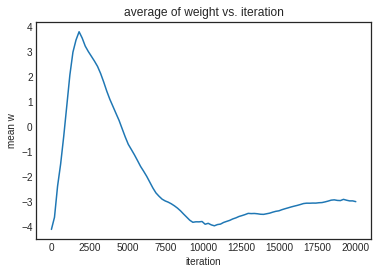

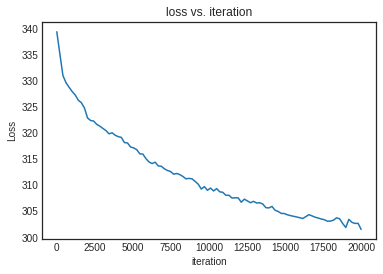

In [ ]:
lg_ = bank_model(X,Y)
pred = []
w_mean, w, L_hist, L, dt, iter, stop_cri = lg_.fit(0.1,20000,0.05,0.06,1,'w_mean')
print(stop_cri, L, dt, iter)

avg = 200
w_mean1 = [None]*(math.floor(len(w_mean)/avg)+1)
for i in range(math.floor(len(w_mean)/avg)):
  w_ = np.mean(w_mean[avg*i:avg*(i+1)])
  w_mean1[i]=w_
if len(w_mean)%avg is not 0:
  w_mean1.append(np.mean(w_mean[-(len(w_mean)%avg):-1]))


L_hist1 = [None]*(math.floor(len(w_mean)/avg)+1)
for i in range(math.floor(len(L_hist)/avg)):
  h_ = np.mean(L_hist[avg*i:avg*(i+1)])
  L_hist1[i]=h_
if len(L_hist)%avg is not 0:
  L_hist1.append(np.mean(L_hist[-(len(L_hist)%avg):-1]))

print(w_mean1)
plt.plot(np.linspace(0,avg*len(w_mean1),len(w_mean1)),w_mean1)
plt.xlabel('iteration')
plt.ylabel('mean w')
plt.title('average of weight vs. iteration')
plt.figure()
plt.plot(np.linspace(0,avg*len(L_hist1),len(L_hist1)),L_hist1)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('loss vs. iteration')

accuracy = Accu_eval_(X,Y,lg_,w)
print(accuracy)

In [ ]:
class corss_validation():
    def __init__(self,olddata,k_fold,model,Accu_eval_):
        self.olddata=olddata
        self.k_fold=k_fold
        self.model=model
        self.traindata=olddata
        self.validata=olddata
        self.Accu_eval_=Accu_eval_
        self.acc=[]
        self.acc_train=[]

    def cut_data(self,no_cut):#no_cut means No. cut. Here generate traindata and validata
        self.traindata=self.olddata
        num_cut=int(self.olddata.shape[0]/self.k_fold)
        for i in range(num_cut):
            self.traindata=self.traindata.drop([num_cut*no_cut])
            self.traindata.index=range(len(self.traindata))
        self.validata=self.olddata.iloc[num_cut*no_cut:num_cut*(no_cut+1)]
        self.validata.index=range(len(self.validata))

    def train_validate(self):
        for i in range (self.k_fold):
            self.cut_data(i)
            X = self.traindata.iloc[:,0:-1]
            Y = pd.DataFrame(self.traindata['ClassLabel'])
            X = X.to_numpy()
            Y = Y.to_numpy()
            lg = self.model(X,Y)
            w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.03,5000,0.03,0.06,1,'w_mean')
            accuracy= self.Accu_eval_(X,Y,lg,w)
            self.acc_train.append(accuracy)
        #print(np.mean(self.acc))
        mean_acc_train=np.mean(self.acc_train)
        return mean_acc_train
    
    

    def validate(self):
        for i in range (self.k_fold):
            self.cut_data(i)
            X = self.traindata.iloc[:,0:-1]
            Y = pd.DataFrame(self.traindata['ClassLabel'])
            X = X.to_numpy()
            Y = Y.to_numpy()
            lg = self.model(X,Y)
            w_mean, w, L_hist, L, dt, iter, stop_cri = lg.fit(0.03,5000,0.03,0.06,1,'w_mean')
            X = self.validata.iloc[:,0:-1]
            Y = pd.DataFrame(self.validata['ClassLabel'])
            X = X.to_numpy()
            Y = Y.to_numpy()
            accuracy= self.Accu_eval_(X,Y,lg,w)
            self.acc.append(accuracy)
        #print(np.mean(self.acc))
        mean_acc=np.mean(self.acc)
        return mean_acc


In [ ]:
def varselect(olddata,tol_var):
    remain_columns=[]
    var=olddata.var()
    for i in range (0,olddata.shape[1]-1):
        if var.array[i]<tol_var:
            remain_columns.append(olddata.columns[i])
    newdata=olddata.drop(columns=remain_columns)
    return newdata


In [ ]:
def mic(x, y):
    m = MINE()
    m.compute_score(x, y)
    return (m.mic(), 0.5)

def MICselection(olddata,k):
  XX = olddata.iloc[:,0:-1]
  YY = pd.DataFrame(olddata['ClassLabel'])
  #XX = XX.to_numpy()
  YY = YY.to_numpy()
  YY=np.array(YY).T
  YY=YY[0]
  data_new =  SelectKBest(lambda X, Y: tuple(map(tuple,np.array(list(map(lambda x:mic(x, Y), X.T))).T)), k).fit_transform(XX,YY)
  #print(np.mean(data_new,axis=0))
  data_new = pd.DataFrame(data_new)
  columsname=[]
  for i in range(data_new.shape[1]):
    columsname.append("feature"+' '+str(i))
  data_new.columns=columsname
  data_new=pd.concat( [data_new,pd.DataFrame(olddata['ClassLabel'])], axis=1 ,ignore_index=True)
  data_new.columns = [*data_new.columns[:-1], 'ClassLabel']
  return data_new

In [ ]:
def add_feature(olddata,order):
  if order==1:
    return olddata
  else:
      Y = pd.DataFrame(olddata['ClassLabel'])
      fea_data=olddata.drop(columns=olddata.columns[olddata.shape[1]-1])
      newdata=fea_data
      for i in range(2,order+1):
        columsname=[]
        for ii in range(olddata.shape[1]-1):
          columsname.append(str(olddata.columns[ii])+' '+str(i))
        newdata0=fea_data**(i*1)
        newdata0.columns=columsname
        newdata=newdata.join(newdata0)
      newdata=newdata.join(Y)
      return newdata
      

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **

[70.7107843137255, 70.83333333333334, 70.80882352941175, 70.73529411764707, 70.83333333333334, 70.95588235294119, 70.83333333333334, 70.56372549019609, 70.6127450980392, 70.68627450980394]
[71.11111111111111, 70.22222222222223, 70.44444444444444, 71.11111111111111, 69.77777777777779, 71.77777777777779, 70.88888888888889, 70.44444444444444, 71.33333333333333, 70.0]


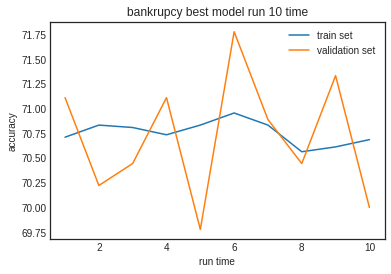

In [ ]:
#in this box is the best model we found, and run 10 times to check its stability
mean_acc_list=[]
mean_acc_train_list=[]
x=[]
for i in range(1,11):
  x.append(i)
  olddata = pd.read_csv('bankrupcy.csv',header=0) 
  olddata=olddata.sample(frac=1.0)#shuffle all the data
  olddata.index=range(len(olddata))
  olddata=MICselection(olddata,3)
  cos=corss_validation(olddata,10,bank_model,Accu_eval_)
  mean_acc=cos.validate()
  mean_acc_list.append(mean_acc)
  mean_acc_train=cos.train_validate()
  mean_acc_train_list.append(mean_acc_train)
plt.plot(x,mean_acc_train_list)
plt.plot(x,mean_acc_list)
plt.title('bankrupcy best model run 10 time')
plt.legend(["train set","validation set"])
plt.xlabel('run time')
plt.ylabel('accuracy')
print(mean_acc_train_list)
print(mean_acc_list)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **

[54.607843137254896, 69.85294117647058, 70.56372549019609, 67.62254901960785, 67.67156862745098, 68.30882352941178, 66.15196078431373, 65.0, 64.24019607843138, 65.36764705882351, 65.88235294117648, 65.73529411764706, 64.50980392156862, 62.64705882352941, 63.48039215686274, 66.12745098039217, 67.23039215686273, 65.17156862745098, 63.18627450980391, 61.07843137254902, 64.5343137254902, 64.09313725490196, 64.09313725490196, 67.8186274509804, 66.98529411764704, 67.1813725490196, 67.45098039215686, 66.64215686274508, 67.15686274509804, 68.45588235294117, 67.00980392156863, 67.81862745098037, 67.40196078431373, 68.11274509803921, 66.8627450980392, 67.30392156862744, 66.8627450980392, 66.54411764705881, 66.07843137254902, 66.93627450980392, 67.05882352941175, 66.96078431372548, 66.66666666666666, 66.69117647058823, 67.42647058823529, 66.69117647058825, 66.59313725490196, 68.23529411764706, 66.61764705882354, 66.7892156862745, 66.81372549019609, 67.9656862745098, 66.86274509803921, 66.98529411

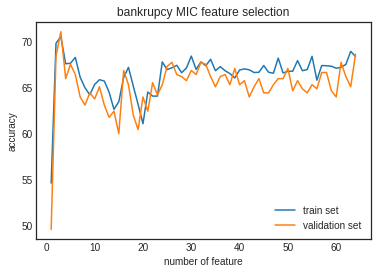

In [ ]:
#in following 3 code box, is the process of find the best model 
#this part is to compare model with different the subsets of features, which was select by feature selection based on the Maximal Information Coefficient (MIC).
mean_acc_list=[]
mean_acc_train_list=[]
x=[]
for i in range(1,65):
    x.append(i)
    olddata = pd.read_csv('bankrupcy.csv',header=0) 
    olddata=olddata.sample(frac=1.0)#shuffle all the data
    olddata.index=range(len(olddata))
    olddata=MICselection(olddata,i)
    cos=corss_validation(olddata,10,bank_model,Accu_eval_)
    mean_acc=cos.validate()
    mean_acc_list.append(mean_acc)
    mean_acc_train=cos.train_validate()
    mean_acc_train_list.append(mean_acc_train)
plt.plot(x,mean_acc_train_list)
plt.plot(x,mean_acc_list)
plt.title('bankrupcy MIC feature selection')
plt.legend(["train set","validation set"])
plt.xlabel('number of feature')
plt.ylabel('accuracy')
print(mean_acc_train_list)
print(mean_acc_list)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[67.72058823529412, 68.4313725490196, 67.99019607843137, 69.16666666666667, 67.79411764705883, 69.01960784313727, 67.69607843137256, 68.79901960784312, 68.72549019607844, 68.48039215686273, 68.87254901960783, 67.0343137254902, 66.69117647058823, 68.1127450980392, 68.57843137254902, 68.11274509803921, 68.77450980392157, 67.84313725490196, 67.89215686274511]
[64.66666666666666, 65.11111111111111, 63.55555555555556, 63.333333333333336, 65.99999999999999, 67.77777777777779, 66.66666666666666, 67.33333333333333, 66.22222222222223, 66.44444444444443, 65.99999999999999, 65.99999999999999, 67.33333333333333, 67.11111111111111, 65.55555555555556, 67.11111111111111, 63.777777777777786, 61.11111111111112, 64.22222222222221]


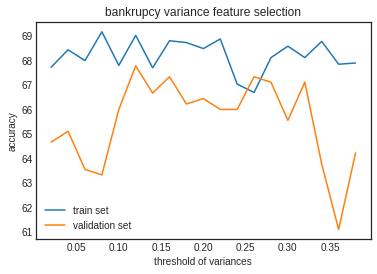

In [ ]:
#this part is to compare model with different the subsets of features, which was select by removing features with low variance.
mean_acc_list=[]
mean_acc_train_list=[]
x=[]
for i in range(1,20):
    tol_var=0+i*0.02
    x.append(tol_var)
    olddata = pd.read_csv('bankrupcy.csv',header=0) 
    olddata=olddata.sample(frac=1.0)#shuffle all the data
    olddata.index=range(len(olddata))
    olddata=varselect(olddata,tol_var)
    cos=corss_validation(olddata,10,bank_model,Accu_eval_)
    mean_acc=cos.validate()
    mean_acc_list.append(mean_acc)
    mean_acc_train=cos.train_validate()
    mean_acc_train_list.append(mean_acc_train)

plt.plot(x,mean_acc_train_list)
plt.plot(x,mean_acc_list)
plt.title('bankrupcy variance feature selection')
plt.legend(["train set","validation set"])
plt.xlabel('threshold of variances')
plt.ylabel('accuracy')
print(mean_acc_train_list)
print(mean_acc_list)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch

[70.58823529411765, 72.00980392156862, 73.48039215686273, 66.47058823529412, 71.49509803921569, 64.33823529411765, 72.30392156862744, 51.25, 66.05392156862746]
[70.22222222222223, 72.44444444444444, 70.22222222222221, 67.11111111111111, 71.11111111111111, 64.22222222222223, 73.1111111111111, 51.777777777777786, 65.77777777777779]


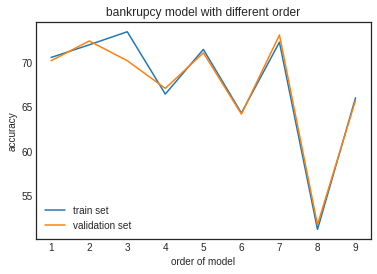

In [ ]:
#this part is to compare model with different order, which was get by using Polynomial Curve Fitting method after feature selection
mean_acc_list=[]
mean_acc_train_list=[]
x=[]
for i in range(1,10):
    x.append(i)
    olddata = pd.read_csv('bankrupcy.csv',header=0)
    olddata=olddata.sample(frac=1.0)#shuffle all the data
    olddata.index=range(len(olddata))
    olddata=MICselection(olddata,3)
    olddata=add_feature(olddata,i)
    cos=corss_validation(olddata,10,bank_model,Accu_eval_)
    mean_acc=cos.validate()
    mean_acc_list.append(mean_acc)
    mean_acc_train=cos.train_validate()
    mean_acc_train_list.append(mean_acc_train)
plt.plot(x,mean_acc_train_list)
plt.plot(x,mean_acc_list)
plt.title('bankrupcy model with different order')
plt.legend(["train set","validation set"])
plt.xlabel('order of model')
plt.ylabel('accuracy')
print(mean_acc_train_list)
print(mean_acc_list)
plt.show()